# 8.5 LLE (Locally Linear embedding : 지역 선형 임베딩)

 
## 강력한 비선형 차원 축소(NLDR) 기술

- 이전 알고리즘처럼 투영에 의존하지 않는 매니폴드 학습

- LLE는 각 훈련 샘플이 가장 가까운 이웃(c.n)에 얼마나 선형적으로 연관되어 있는지 측정

- 그 후 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음

- 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는 데 잘 작동하는 방법



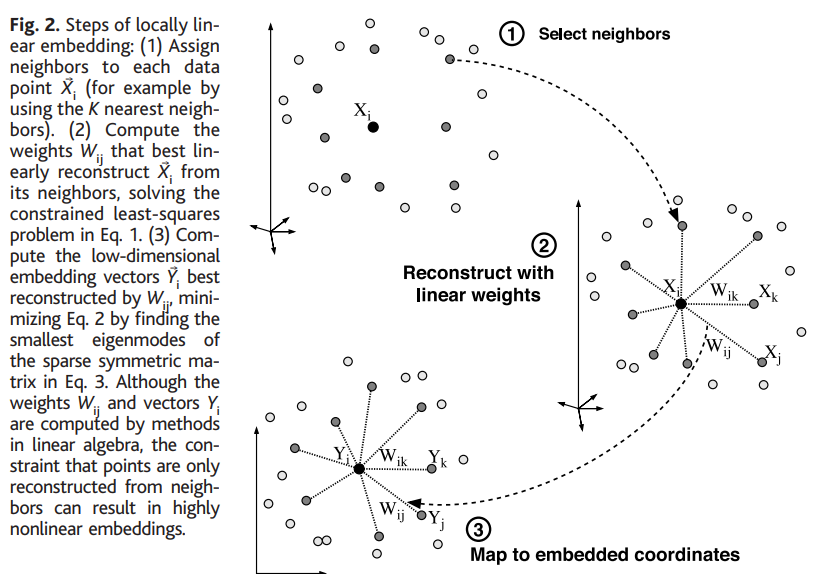

### 1. 데이터 포인트 Xi에 대해 Xi과 가장 가까운 k개의 이웃점 Xj들을 선택

### 2. Xj로 부터 Xi를 가장 잘 재구성하는 가중치 Wij를 구함

### - 이때 가중치 Wij는 데이터 포인트 Xi와 Xj 들간의 지역 선형 관계를 나타냄

### 3. 이러한 관계가 최대한 보존 되도록 데이터를 저차원인 d차원 공간으로 매핑

 


# [샘플 ]

In [7]:
# 환경세팅 !!

# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# 데이터 세팅
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [5]:
## LLE 적용
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


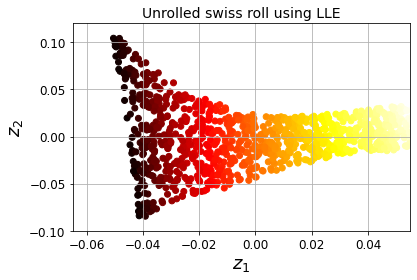

In [8]:
## 결과 2D 데이터셋

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

- 스위스 롤이 완전히 펼쳐졌고, 지역적으로는 샘플 간 거리가 잘 보존되어 있음

- 반면에 크게 보면 샘플 간 거리가 잘 유지되어 있지 않음

- 펼쳐진 스위스 롤의 오른쪽은 압축되어 있고, 왼쪽은 확장되어 있음

  -> 그럼에도 불구하고, LLE는 매니폴드를 모델링하는 데 잘 동작함

## LLE가 작동하는 방식

### 1. 먼저 알고리즘이 각 훈련 샘플 x(i)에 대해 가장 가까운 k개의 샘플을 찾음 (앞 코드에선 k=10)

- 그런 다음, 이 이웃에 대한 선형 함수로 x(i)를 재구성

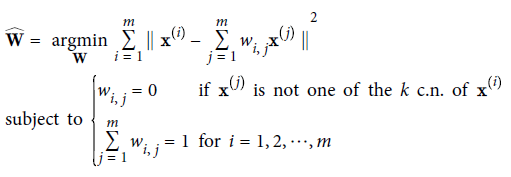

- x(j)가 x(i)의 가장 가까운 k개 이웃 중 하나가 아닐 경우, wi,j = 0 이 됨

- 그러므로 LLE는 첫 단계는 위 식과 같은 제한이 있는 최적화 문제가 됨

- W는 가중치 wi,j를 모두 담은 가중치 행렬

- 두 번째 제약은 각 훈련 샘플 x(i)에 대한 가중치를 단순히 정규화하는 것

- 이 단계를 거치면 (가중치 wi,j-hat를 담은) 가중치 행렬 W-hat은 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있음

 

### 2. 두 번째 단계는 가능한 한 이 관계가 보존되도록 훈련 샘플을 d차원 공간(d<n)으로 매핑

- 만약 z(i)가 d차원 공간에서 x(i)의 상(image)이라면 가능한 한 z(i)와 Σ wi,j-hat * z(j) 사이의 거리가 최소화 되어야 함(아래 식 참고)

- 이는 아래 식과 같은 제약이 없는 최적화 문제로 바꾸어줌

- 첫 번째 단계는 샘플을 고정하고 최적의 가중치를 찾지만, 두 번째 단계에서는 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾음

- Z는 모든 z(i)를 포함하는 행렬

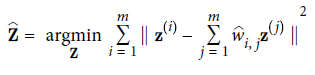


사이킷런이 제공하는 LLE 구현의 계산 복잡도는 k개의 가장 가까운 이웃을 찾는 데 O (m log(m)n log(k)),

가중치 최적화에 O(mnk^3), 저차원 표현을 만드는데 O(dm^2)

- 마지막 항의 m^3 때문에 이 알고리즘을 대량의 데이터 셋에 적용하기 어려움